In [1]:
import sys
sys.path.append('../')

In [2]:
import pennylane as qml 
from pennylane import numpy as np 
import matplotlib.pyplot as plt 
from main import VarFourier
from main import RY_ansatz, Rot_ansatz, ZGR_ansatz

In [5]:
num_qubits = 3

In [6]:
def init_state():
    #qml.AmplitudeEmbedding(features=vecs[:,0], wires=range(num_qubits))
    pass 

In [7]:
num_layers = 3
var_state_class = ZGR_ansatz(num_qubits, num_layers, bond_dim=2)
#var_state_class = Rot_ansatz(num_qubits,num_layers)
#var_state_class = RY_ansatz(num_qubits,num_layers)
var_state = var_state_class.construct_circuit
num_params = var_state_class.num_params


(<Figure size 2600x400 with 1 Axes>, <Axes: >)

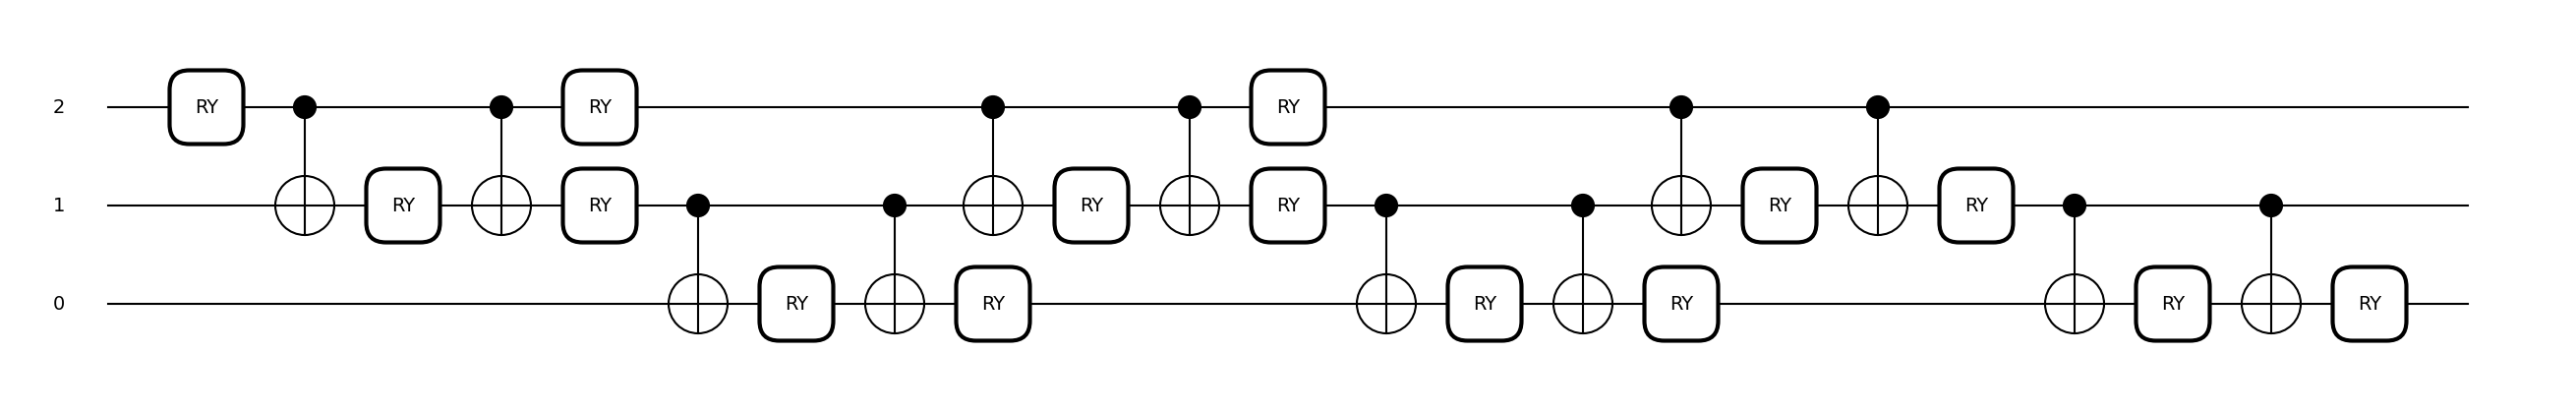

In [8]:
qml.draw_mpl( var_state )( num_params*[0] )

In [9]:
device = qml.device( "lightning.qubit", 
                    wires=num_qubits)

varqft = VarFourier( num_qubits,
                    lambda x : -0.5/(np.abs(x)),
                    lambda p : 0.5*p**2,
                    device,
                    xmin=-20,
                    xmax=20,
                    var_state  = var_state,
                    init_state = init_state,
                    semi_classical=False
                    )

In [10]:
vals, vecs = varqft.energy_eigens()
val = vals[0]
vec = vecs[:,0]
val2 = vals[1]
vec2 = vecs[:,1] 
vals

array([-0.15883913, -0.10725737, -0.03273891, -0.02472291, -0.01034951,
        0.01922105,  0.04083149,  0.10279149])

In [11]:
beta = np.exp(-0.5*np.sqrt(np.abs(val)))/(2*np.sqrt(np.abs(val)))

In [12]:
(1+2*beta)**2

9.337831603116983

In [13]:
4/25

0.16

In [14]:
vals[4]/vals[1]

0.09649231565096364

In [15]:
params_init = np.random.randn( num_params )*0.001
#params_pre = params_ground[-1]
#params_ground, energies_ground = varqft.run( np.concatenate((params_pre,np.random.randn(num_qubits)*1e-3)), max_iterations=500, learning_rate=0.5, conv_tol=1e-6 )
params_ground, energies_ground = varqft.run( params_init , max_iterations=500, learning_rate=0.2, conv_tol=1e-4 )

Step = 0,  Energy = -0.03018720
Step = 5,  Energy = -0.10938062
Step = 10,  Energy = -0.13323557
Step = 15,  Energy = -0.14419729
Step = 20,  Energy = -0.15075263
Step = 25,  Energy = -0.15352950
Step = 30,  Energy = -0.15676884


In [16]:
params_init

tensor([ 2.12043661e-03, -9.93784239e-04, -1.11312559e-03,
         1.22639821e-03,  1.34001220e-03,  1.08881921e-03,
         1.28494233e-03, -1.19615770e-03, -7.84291603e-05,
        -1.39414023e-04,  6.35261844e-04,  1.19506128e-03,
        -1.48151980e-03,  9.17909202e-04,  9.89720803e-04,
         1.29272683e-03,  9.13216737e-04, -8.72799040e-04,
        -4.86462098e-04, -5.90100647e-04, -5.96117752e-04,
        -6.08787223e-04,  1.66017564e-03,  2.71054959e-04,
        -7.69545236e-04,  6.42237584e-04, -1.18273364e-03,
        -6.92358345e-04,  8.51697089e-04,  7.73822028e-04,
        -8.54344801e-04,  1.12973119e-03, -6.91341064e-04,
         3.68752265e-04,  1.18485304e-03, -1.68485739e-03,
        -4.81701337e-04, -2.02024239e-04, -1.28520812e-03], requires_grad=True)

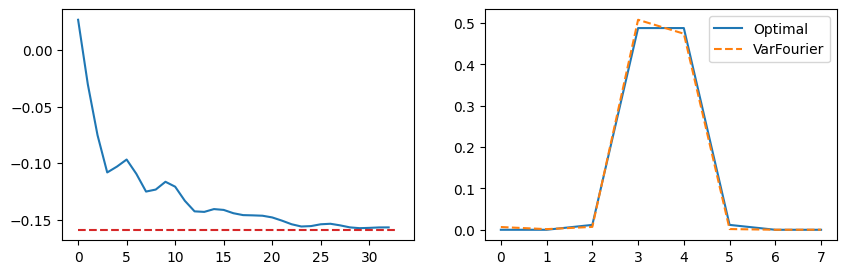

In [17]:
fig, ax = plt.subplots( 1, 2, figsize=(10,3) ) 

ax[0].plot( energies_ground )
ax[0].hlines( val, 0, len(energies_ground), colors='tab:red', linestyles='--' ) 

ground_state = varqft.state( params_ground[-1] )

ax[1].plot( np.abs(vecs[:,0])**2) 
ax[1].plot( np.abs(ground_state)**2, '--' ) 
ax[1].legend(['Optimal','VarFourier']) 

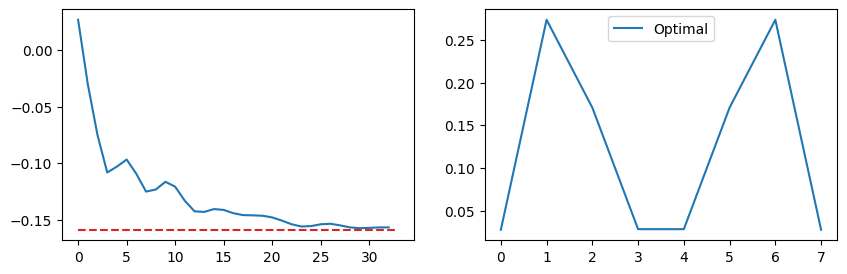

In [18]:
fig, ax = plt.subplots( 1, 2, figsize=(10,3) ) 

ax[0].plot( energies_ground )
ax[0].hlines( val, 0, len(energies_ground), colors='tab:red', linestyles='--' ) 

ground_state = varqft.state( params_ground[-1] )

ax[1].plot( np.abs(vecs[:,3])**2) 
#ax[1].plot( np.abs(ground_state)**2, '--' ) 
ax[1].legend(['Optimal','VarFourier']) 

In [19]:
abs(np.vdot( ground_state, vec ))**2

0.9859071240588844

In [20]:
params_ground[-1]

Array([ 5.8133209e-01,  3.1407702e-01, -6.8810523e-01,  1.4167242e-01,
       -5.2044141e-01,  9.5285082e-01,  1.0572236e+00, -1.1766683e+00,
        4.1502979e-02, -5.2192080e-01,  2.4052151e-01,  1.6390446e-01,
       -2.4639906e-01, -1.5208697e+00, -5.2079165e-01,  1.2927268e-03,
        9.1321673e-04, -8.7279902e-04, -4.8646209e-04, -5.9010065e-04,
       -5.9611775e-04, -6.0878723e-04,  1.6601756e-03,  2.7105495e-04,
       -7.6954521e-04,  6.4223760e-04, -1.1827337e-03, -6.9235836e-04,
        8.5169711e-04,  7.7382202e-04, -8.5434481e-04,  1.1297312e-03,
       -6.9134106e-04,  3.6875225e-04,  1.1848530e-03, -1.6848574e-03,
       -4.8170134e-04, -2.0202424e-04, -1.2852082e-03], dtype=float32)

In [21]:
varqft = VarFourier( num_qubits, 
                    lambda x : -0.5/(np.abs(x)),
                    lambda p : 0.5*p**2,
                    device,
                    xmin=-20,
                    xmax=20,
                    var_state  = var_state, 
                    init_state = init_state, 
                    orthovals  = 25, 
                    orthoparams= np.copy(params_ground[-1]) 
                    ) 

In [22]:
params_init_ex = np.random.randn( num_params )*0.001

params_excited, energies_excited = varqft.run( params_init_ex, max_iterations=300, learning_rate= 0.1, conv_tol=1e-6)

/home/ctabares/.virtualenvs/qhack/lib/python3.11/site-packages/pennylane/math/utils.py:227: UserWarning: Contains tensors of types {'autograd', 'jax'}; dispatch will prioritize TensorFlow, PyTorch, and  Jax over Autograd. Consider replacing Autograd with vanilla NumPy.
  warnings.warn(


Step = 0,  Energy = 17.19212532
Step = 5,  Energy = 0.11723019
Step = 10,  Energy = 4.25647020
Step = 15,  Energy = 4.29236460
Step = 20,  Energy = -0.05383811
Step = 25,  Energy = 0.42781574
Step = 30,  Energy = 0.01892469
Step = 35,  Energy = 0.22534055
Step = 40,  Energy = -0.10582245
Step = 45,  Energy = -0.10514881
Step = 50,  Energy = -0.07872910
Step = 55,  Energy = -0.05154299
Step = 60,  Energy = -0.08924015
Step = 65,  Energy = -0.10714223
Step = 70,  Energy = -0.10702737
Step = 75,  Energy = -0.10715283
Step = 80,  Energy = -0.10523742
Step = 85,  Energy = -0.09698888
Step = 90,  Energy = -0.09606080
Step = 95,  Energy = -0.09895250
Step = 100,  Energy = -0.09958859
Step = 105,  Energy = -0.10014738
Step = 110,  Energy = -0.10000066
Step = 115,  Energy = -0.10119880
Step = 120,  Energy = -0.10183453
Step = 125,  Energy = -0.10160231
Step = 130,  Energy = -0.10184245
Step = 135,  Energy = -0.10212177
Step = 140,  Energy = -0.10250111
Step = 145,  Energy = -0.10251897
Step = 1

In [23]:
val

-0.1588391306337769

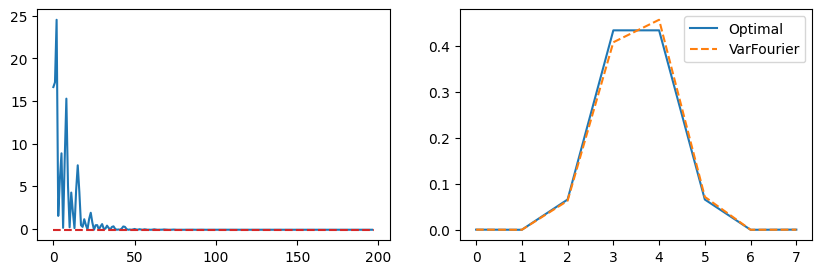

In [24]:
fig, ax = plt.subplots( 1, 2, figsize=(10,3) ) 

ax[0].plot( energies_excited )
ax[0].hlines( val2, 0, len(energies_excited), colors='tab:red', linestyles='--' ) 

excited_state = varqft.state( params_excited[80] )

ax[1].plot( np.abs(vec2)**2) 
ax[1].plot( np.abs(excited_state)**2, '--' ) 
ax[1].legend(['Optimal','VarFourier']) 

In [40]:
abs(np.vdot( ground_state, vec ))**2

0.9997133196180503

In [41]:
abs(np.vdot( ground_state, excited_state ))**2 

0.06873983727190591

In [42]:
abs(np.vdot( excited_state, vec2 ))**2

0.17217776825898531